## MA755 - 7 Feb 2017

Material from _Chapter 1. End-to-end Machine Learning project_ of

> "[Hands-On Machine Learning with Scikit-Learn and TensorFlow](http://shop.oreilly.com/product/0636920052289.do)"<br>
by Aurélien Géron
Published by O'Reilly Media, Inc., 2017

In [1]:
import os 
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True) #create a leaf directory and all intermediate ones within the same directory 
    tgz_path = os.path.join(housing_path, "housing.tgz") # path of the tgz file
    urllib.request.urlretrieve(housing_url, tgz_path) # get the data from root
    housing_tgz = tarfile.open(tgz_path) # open tar file
    housing_tgz.extractall(path=housing_path) # extract data
    housing_tgz.close()

In [2]:
fetch_housing_data()

The file `housing.tgz` is downloaded into the `datasets/housing` directory, which is contained in the same directory as this notebook. The file `housing.csv` is extract from the `housing.tgz` and stored in the same directory.

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    # `housing_path` is relative to the directory containing this script
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

Load the data from the `housing.csv` file into a `DataFrame` Pandas object stored in `housing`. 

In [4]:
housing = load_housing_data()
print(type(housing))
housing.head()

<class 'pandas.core.frame.DataFrame'>


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

C:\Users\Danjie\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,NaN,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,NaN,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,NaN,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA6FDE0978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001BA70388128>]], dtype=object)

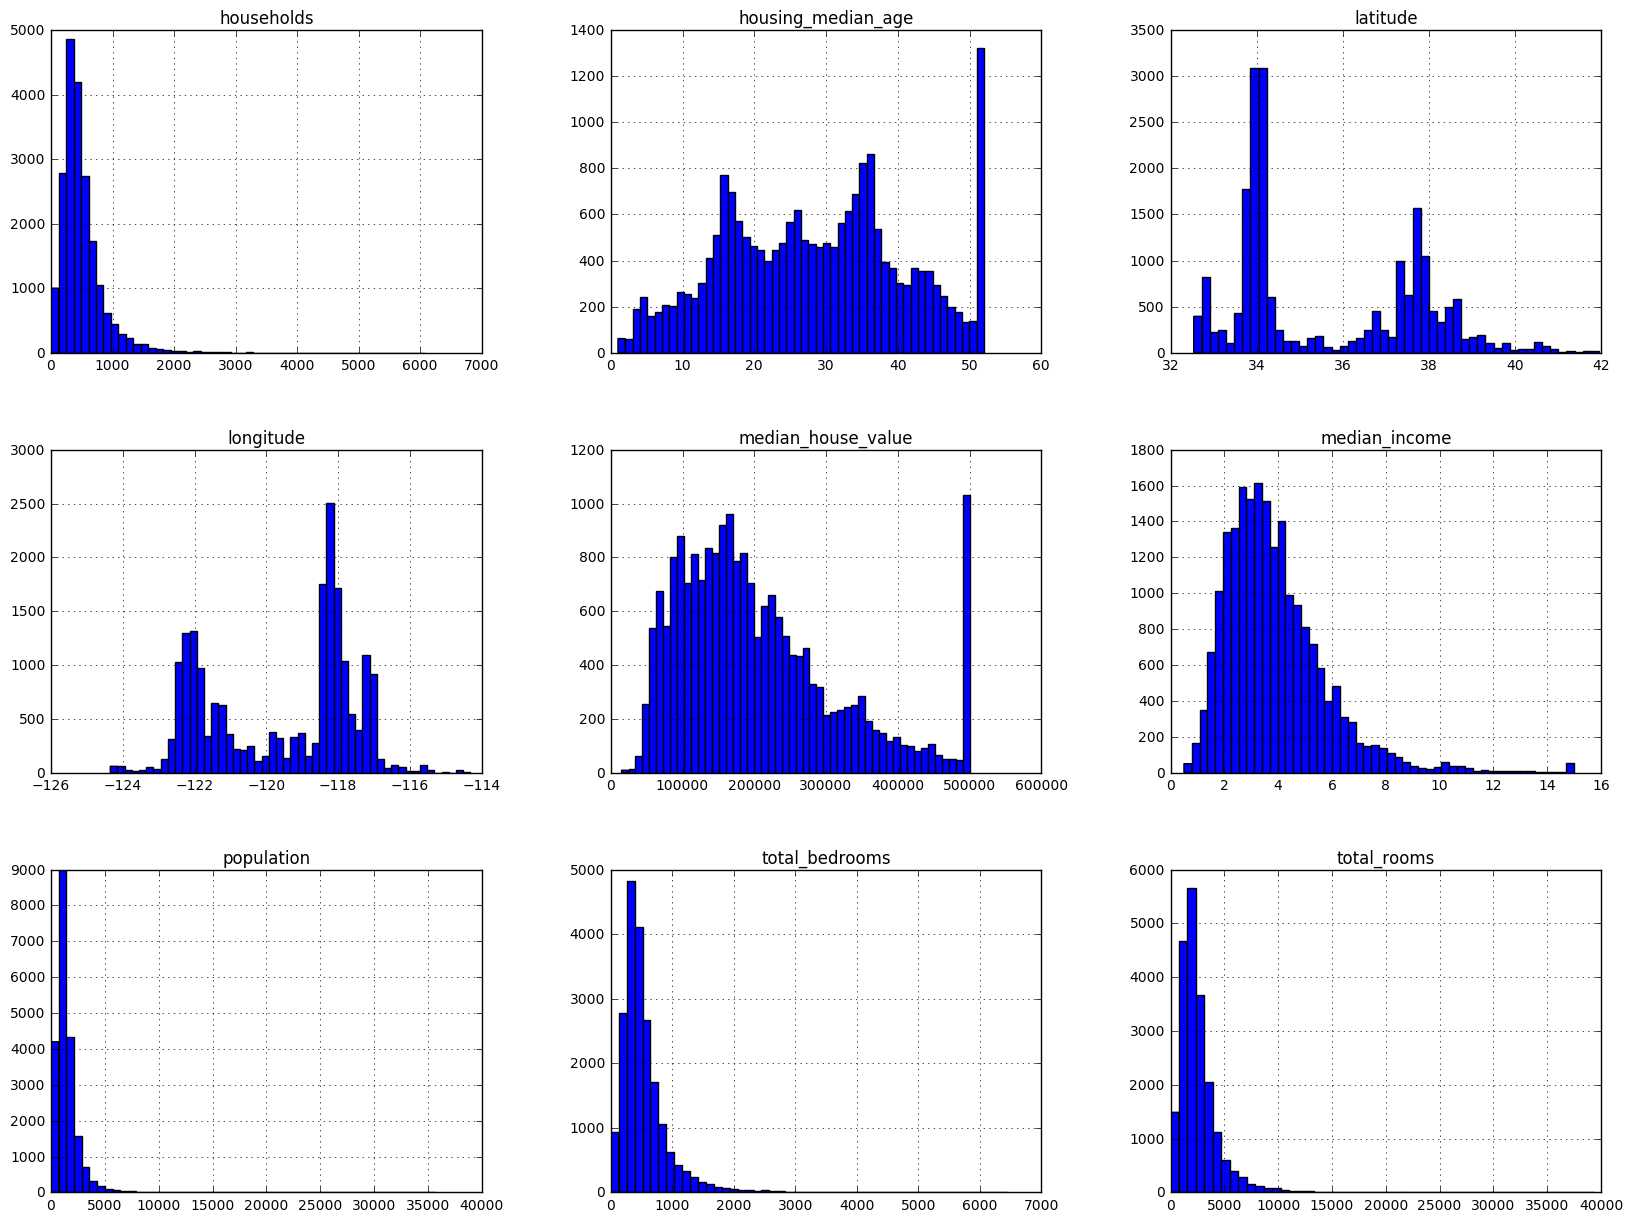

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

Split the dataset into a train set `train_set` and a test set `test_set`. 

In [9]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) #randomly generate numbers as indices#
    test_set_size = int(len(data) * test_ratio) # number of test set
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


Another approach for spliting the data set into a train set and a test set.

In [11]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [12]:
housing_with_id = housing.reset_index()   # adds an `index` column + the original dataset
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [13]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [15]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5) # ceiling of the input
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True) # replace values that are larger than 5
housing["income_cat"].describe()

count    20640.000000
mean         3.006686
std          1.054618
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: income_cat, dtype: float64

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) # n_splits : Number of re-shuffling & splitting iterations.
for train_index, test_index in split.split(housing, housing["income_cat"]): #stratified sampling using income_cat
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [17]:
list(split.split(housing, housing["income_cat"])) # generate two list, train and test

[(array([17606, 18632, 14650, ..., 13908, 11159, 15775], dtype=int64),
  array([ 5241, 10970, 20351, ...,  4019, 12107,  2398], dtype=int64))]

In [18]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [19]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

In [20]:
housing = strat_train_set.copy()

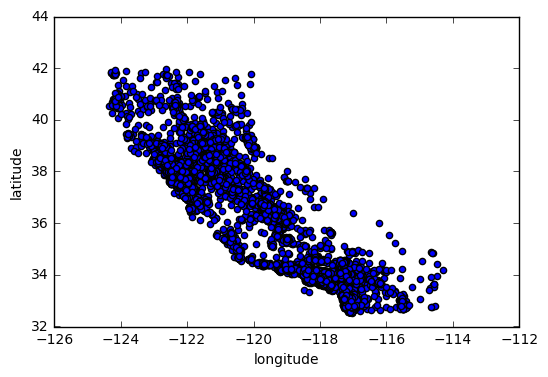

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude")

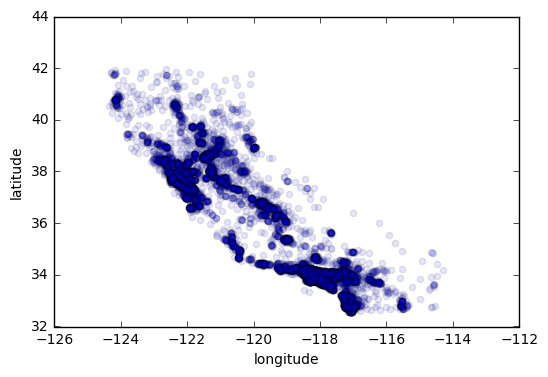

In [22]:
import matplotlib.pyplot as plt
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1) #alpha, transaparency 
plt.show()

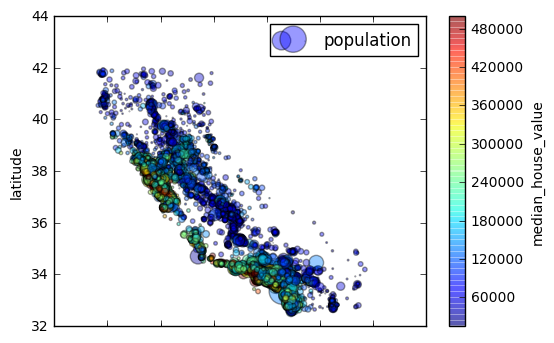

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
     s=housing["population"]/100,label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
) # cmap,a colormap or registered colormap name; s-size; jet, a color plate name
plt.legend()
plt.show()

In [24]:
corr_matrix = housing.corr()

In [25]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA72FEF240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001BA7344AE80>]], dtype=object)

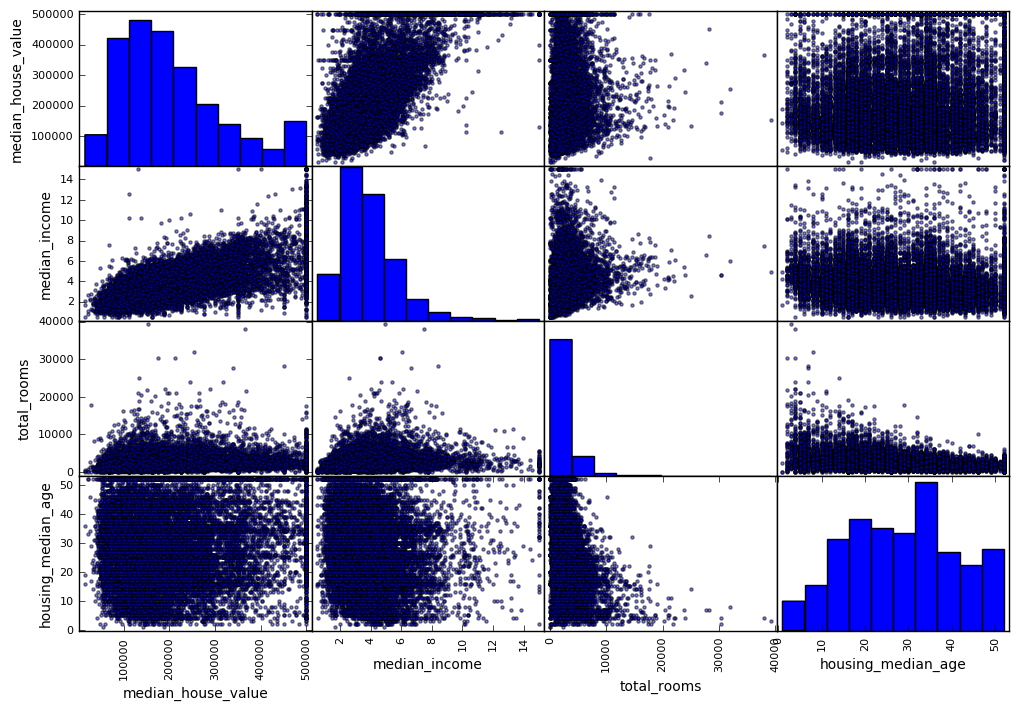

In [26]:
from pandas.tools.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

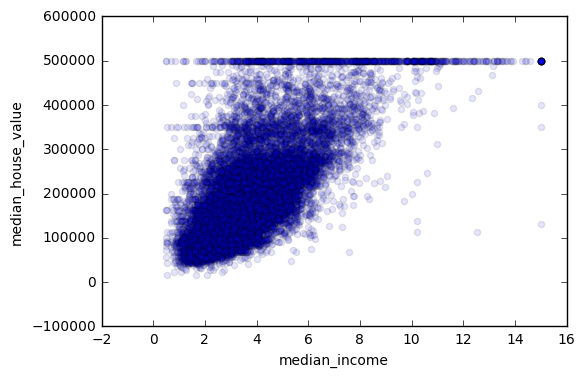

In [27]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)

In [28]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["population"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [29]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.199429
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [30]:
housing = strat_train_set.drop("median_house_value", axis=1) #drop this column
housing_labels = strat_train_set["median_house_value"].copy()
print(housing.shape)
print(housing_labels.shape)

(16512, 9)
(16512,)


In [31]:
housing.dropna(subset=["total_bedrooms"])    # option 1， remove na
housing.drop("total_bedrooms", axis=1)       # option 2, drop the column
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median)     # option 3, fill in with median

17606     351.0
18632     108.0
14650     471.0
3230      371.0
3555     1525.0
19480     588.0
8879      317.0
13685     293.0
4937      465.0
4861      229.0
16365     951.0
19684     559.0
19234     501.0
13956     582.0
2390      495.0
11176     649.0
15614     545.0
2953      251.0
13209     409.0
6569      261.0
5825      913.0
18086     538.0
16718     945.0
13600     278.0
13989     444.0
15168     190.0
6747      563.0
7398      366.0
5562      133.0
16121     416.0
          ...  
12380     767.0
5618       24.0
10060     539.0
18067     438.0
4471      797.0
19786     300.0
9969      393.0
14621    1051.0
579       302.0
11682    1615.0
245       460.0
12130     537.0
16441     544.0
11016     428.0
19934     422.0
1364       34.0
1236      829.0
5364      272.0
11703     300.0
10356     449.0
15270     515.0
3754      373.0
12166     756.0
6003      932.0
7364      212.0
6563      236.0
12053     294.0
13908     872.0
11159     380.0
15775     682.0
Name: total_bedrooms, dt

In [32]:
housing.drop("longitude", axis=1)  #inplace = True, update the dataset, or assign the return object to a new one
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [33]:
from sklearn.preprocessing import Imputer # impute values#

imputer = Imputer(strategy="median")

In [34]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [35]:
imputer.fit(housing_num) # apply imputer to housing_num

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [36]:
imputer.statistics_
housing_num.median().values

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [37]:
X = imputer.transform(housing_num)

In [38]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [39]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat) #Fit label encoder and return encoded labels
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3], dtype=int64)

In [40]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [41]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [42]:
housing_cat_1hot.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

In [43]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ..., 
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

### Custom transformers

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [47]:
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('label_binarizer', LabelBinarizer()),
    ])

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [48]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

# DANJIE'S PART

After all data cleaning and manipulation process, now we're ready to apply differenct algorithms on the dataset and find out the best model.

In [64]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

This is to apply the liner regression on the prepared housing dataset (housing_prepared) to predict median housing price(housing_labels).

for the output:
copy_X: If True, X will be copied; else, it may be overwritten.
fit_intercept:  If True, X will be copied; else, it may be overwritten.
n_jobs: The number of jobs to use for the computation.default 1. If -1 all CPUs are used.

In [86]:
some_data = housing.iloc[:5] 
some_labels = housing_labels.iloc[:5] # take the first five instances to try the model
some_data_prepared = full_pipeline.transform(some_data) # Use the defined full_pipeline to transform some_data
print("Predictions:\t", lin_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 210644.60459286  317768.80697211  210956.43331178   59218.98886849
  189747.55849879]
Labels:		 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


Try the liner regression model on the first five records, and see the comparison between predictions and true values. The result shows that predictions are not accurate enough, especially the second one. That prediction is doubled. 

In [85]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared) # make predictions on the whole training dataset
lin_mse = mean_squared_error(housing_labels, housing_predictions) # get MSE of the model
lin_rmse = np.sqrt(lin_mse) # get RMSE of the model
lin_rmse

68628.198198489234

The model does not work very well on the five records. In order to understand how the model performs on the whole training dataset, we need to measure the model's RMSE. The above block first uses the predict() method to make predictions on the whole training dataset, and then apply the mean_squared_error() to calculate MSE. Finally, by using the np.sqrt function, we can get this model's RMSE, which is 68,628. This means for every predicted median housing value, it could be $68,628 more or less than the true value. It's hard to accept the predictions. 

In [83]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor() 
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

The liner regression model is not satifying. So we try the decision tree model on the training dataset.

In [84]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Similar to what we did in the liner regression model, the above block calculate the decision tree model's RMSE. Now the RMSE is 0! It seems to be perfect. But realistically, it is almost impossible to have a 100% accuracy. Therefore, before using this model to make prediction, it might be better to do validation first, that is to split the training dataset into two. One for training and the other one for validation.

In [94]:
np.random.seed(123) # to make sure we can get the same result for the next run
from sklearn.model_selection import cross_val_score
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10) # using negative MSE as scoring function to do 10 fold cross-validation
tree_rmse_scores = np.sqrt(-tree_scores)

The above code use the cross_val_score() function from sklearn.model_selection module to do a 10-fold cross validation for the decision tree model. We will get 10 evaluation scores, which is "neg_mean_squared_error" in this case. The reason of using negative value here is that the Scikit-Learn cross-validation features prefer greater values, which is opposite to how we evaluate MSE.

In [102]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)


Scores: [ 69469.46710407  66122.98683741  70876.06240705  68745.84617884
  71368.84021086  74827.19459309  70428.47310329  70825.7860212
  78182.97901742  70573.28593818]
Mean: 71142.0921411
Standard deviation: 3129.53964759


Now we define a function to display the 10 RMSE generated in the cross-validation process, their mean,and stand deviation. The decision tree model seems to be even worse than the liner regression model with higher RMSE, and the average RMSE of the 10 iteration is 71,142. This means the decision tree model's has approximately $71 thousand variance from the true median housing value. And this variation could change by about $3,000, according on the standard deviation. Still, the model is not satisfying.

In [98]:
np.random.seed(123) # to make sure we can get the same result for the next run
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 66782.73843989  66960.118071    70347.95244419  74739.57052552
  68031.13388938  71193.84183426  64969.63056405  68281.61137997
  71552.91566558  67665.10082067]
Mean: 69052.4613635
Standard deviation: 2731.6740018


From the cross-validation results we see that RMSE increases a lot. To make sure everything works fine, we do the same thing for the liner regression model to verify the process. The results and mean are close to the previous result. Therefore, the process is fine. We believe that the decision tree model is overfitting on the training dataset. The liner regression model performs better.

In [104]:
np.random.seed(123) 
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor() 
forest_reg.fit(housing_prepared, housing_labels) # apply random forest model on the training dataset
forest_predictions = forest_reg.predict(housing_prepared) # get predictions
forest_mse = mean_squared_error(housing_labels, forest_predictions) # get MSE
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10) # do cross-validation
forest_rmse_scores = np.sqrt(-forest_scores)
forest_rmse_scores
display_scores(forest_rmse_scores)
np.sqrt(forest_mse)

Scores: [ 51904.76665671  50199.6972325   52687.27646023  54353.20293846
  52422.15095247  55370.79812239  50932.31016988  49932.4345954
  55291.629762    53597.20114497]
Mean: 52669.1468035
Standard deviation: 1874.13061637


22330.269195090568

Now we try a more complex model, Random Forest. Random Forest works by training many decision trees, and each tree only contain a subset of the independent variables. The final prediction is the average of all trees' predictions.
In the above code, we build a random forest model on the prepared training dataset, make predictions on the same dataset, and calculate MSE, which is 22,330. We also apply the cross-validation technique. From the result we can see that RMSEs on the validation datasets get much higher. We need to be careful that the random forest model is still overfitting.

Now we've built three models. To make the models better, we can fine-tune them by adjusting the hyperparameters in the model.

In [106]:
from sklearn.model_selection import GridSearchCV
np.random.seed(123) 
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ] # define which hyperparameters and corresponding values we want to experiment

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error') # search the best combination using 5-fold cross-validation

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'max_features': [2, 3, 4], 'n_estimators': [3, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

Instead of tuning hyperparameters manually, GridSearchCV from the sklearn.model_selection module can help us find the best value. The above codes first create a dictionary to define what parameters we want to search the best value for and candidate values. Two ways are defined within this dictionary. The first one evaluates 12 combinations. The second one evaluates 6 combinations and bootstrap is not applied. Then the GridSearchCV() function could explore all combinations of the hyperparameter values in the random forest model with 5-fold cross-validation. Finally, we apply the GridSearchCV() on the training dataset.

In [113]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

According to the result, we should set n_estimators to 30, and max_features to 6 in the random forest model. We can also get the best estimators with the below code.

In [112]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [111]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64571.5576936 {'n_estimators': 3, 'max_features': 2}
55562.2138405 {'n_estimators': 10, 'max_features': 2}
52923.903286 {'n_estimators': 30, 'max_features': 2}
59408.1382314 {'n_estimators': 3, 'max_features': 4}
52640.1270252 {'n_estimators': 10, 'max_features': 4}
50595.9334795 {'n_estimators': 30, 'max_features': 4}
59623.7759476 {'n_estimators': 3, 'max_features': 6}
52183.6861156 {'n_estimators': 10, 'max_features': 6}
49980.4478804 {'n_estimators': 30, 'max_features': 6}
57937.3728674 {'n_estimators': 3, 'max_features': 8}
52075.6635853 {'n_estimators': 10, 'max_features': 8}
50039.2561108 {'n_estimators': 30, 'max_features': 8}
61864.0642925 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54675.9898144 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59785.2468676 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52810.2106467 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
58265.216148 {'bootstrap': False, 'max_features': 4, 'n_estimat

Codes above help us understand how we find out the best hyperparameters. For the 18 combinations of hyperparameter values, we can get 18 RMSE. The combination with the smallest RMSE is the best. In this case, when n_estimators=30 and max_features=6, the model has the smallest RMSE, 49,980. This is better than the previous random forest model.

In [62]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([  7.42563911e-02,   6.60304542e-02,   4.23683404e-02,
         1.57172545e-02,   1.48369537e-02,   1.39085743e-02,
         1.39674772e-02,   3.91193352e-01,   5.51974476e-02,
         1.06795314e-01,   4.45099217e-02,   9.47763664e-03,
         1.44050792e-01,   1.12989279e-04,   3.33394531e-03,
         4.24315562e-03])

When we build models, it is very important to understand the variable importance. In our case, among all the models, random forest perform the best. We can check the relative importance of each variable when using random forest model to make predictions. The best_estimator_.feature_importances_() method can help us achieve this goal. It gives us an array indicating the importance of each variable. However, it is hard for us to know the corresponding variable of each value. Actually, we can do further steps to display corresponding variable names.

In [118]:
np.random.seed(123)
final_model = grid_search.best_estimator_ # final model with hyperparameter fine-tuned

X_test = strat_test_set.drop("median_house_value", axis=1) # take out the response variable as independent variable
y_test = strat_test_set["median_house_value"].copy() # define response variable

X_test_prepared = full_pipeline.transform(X_test) # make transformation for independent variables of the test set

final_predictions = final_model.predict(X_test_prepared) # make predictions

final_mse = mean_squared_error(y_test, final_predictions) # calculate MSE
final_rmse = np.sqrt(final_mse)  
final_rmse

48275.801267926974

We've found out the best model and fine-tuned its hyperparameters. Now, we can use the final model to make predictions for the test set. The above code shows the whole process. First we need to define the independent and depend variables. Then we make transformation for the independent variables in the test set before making prediction. Finally, we use the final model to make predictions and calculate the RMSE. RMSE of the final model is 48,276. Therefore, when we use the final model to make predictions. The difference between true value and the prediction would be about $48 thousand.

The end